In [1]:
import numpy as np
import itertools
import random

In [2]:
def findmax(L):
    m=0
    for i in range(len(L)):
        for j in range(len(L[i])):
            if L[i][j]>m:
                m=L[i][j]
    return m


def findAdjacentElements(test_list,element):
    res = []
    for idx, ele in enumerate(test_list):
         if ele==element:
            # Checking for all cases to append
            if idx == 0:
                res.append((None, test_list[idx + 1]))
            elif idx == len(test_list) - 1:
                res.append((test_list[idx - 1], None))
            else:
                res.append((test_list[idx - 1], test_list[idx + 1]))
    return res

def plug_at_position(array,element,position):
    length_array=len(array)
    target_array=[]
    count=0
    
    while count<=position:
        target_array=[*target_array,array[count]]
        count=count+1
        
    target_array=[*target_array,element]
    while count<len(array):
        target_array=[*target_array,array[count]]
        count=count+1
        
    return target_array

In [3]:
class Barnette_Graph(object):
    def __init__(self, face_vertex_dict):
        
        #states can be defined as a subset of the set of faces, state space is then the power set of the set of faces
        #face_vertex_dict is a dictionary whose keys are faces and values are the vertex indices of the corresponding key face
        
        self.face_vertex_dict=face_vertex_dict
        
    def string_to_list(self,string):
        l=string.split('.')
        return(l)
    
    def boundary_and_interior(self, state):
        state_list=self.string_to_list(state)
        vertices_in_state=[]
        for face in state_list:
            vertices_in_face=self.face_vertex_dict[face]
            for vertex in vertices_in_face:
                vertices_in_state.append(vertex)
        
        unique, counts = np.unique(np.array(vertices_in_state), return_counts=True)
        boundary_vertex_list=unique[counts<3]
        interior_vertex_list=unique[counts>=3]
        return boundary_vertex_list, interior_vertex_list
    
    def startState(self):
        maxface='1'
        for key in self.face_vertex_dict.keys():
            if len(self.face_vertex_dict[key])>len(self.face_vertex_dict[maxface]):
                maxface=key
        return maxface
    
    def isEnd(self, state):
        boundary_vertex_list, interior_vertex_list=self.boundary_and_interior(state)
        return len(boundary_vertex_list) == findmax(list(self.face_vertex_dict.values())) and len(interior_vertex_list)==0
    
    def actions(self, state):
        #return a list of valid actions
        state_list=self.string_to_list(state)
        result=[]
        for key in self.face_vertex_dict.keys():
            state_vertices=[]
            for face in state_list:
                for vertex in self.face_vertex_dict[face]:
                    state_vertices.append(vertex)
            state_vertices=set(state_vertices)
            if key not in state_list:
                if len(set(self.face_vertex_dict[key]).intersection(state_vertices))==2:
                    result.append(key)
        return result
        
    def Successor_and_Cost(self, state):
        # create (new_state, cost) tuple
        
        allowed_actions=self.actions(state)
        
        succ_and_cost=[]
        for act in allowed_actions:
            newState=state+'.'+act
            boundary_vertex_list, interior_vertex_list=self.boundary_and_interior(newState)
            gamma=1
            cost=-len(boundary_vertex_list)+gamma*len(interior_vertex_list)
            #cost=(1/len(boundary_vertex_list))+gamma*len(interior_vertex_list)
            #cost=100*len(interior_vertex_list)+.000000001
            succ_and_cost.append((act,newState,cost))
            
        return (succ_and_cost)
    
    #def states(self):
    #    states=[]
    #    for i in range(1,int(len(list(face_vertex_dict.keys()))*1.5/3)+1):
    #        combinations = list(itertools.combinations(list(face_vertex_dict.keys()), i))
    #        for s in combinations:
    #            s=list(s)
    #            s=''.join(map(str, s))
    #            states.append(s)
    #    return states
    

In [4]:
def uniformcostsearch(problem):
    frontier={}
    explored={}
    frontier[problem.startState()]=0
    
    while len(frontier)>0:
        
        state_with_minimum_pastcost=min(frontier, key=frontier.get)
        value=frontier[state_with_minimum_pastcost]
        explored[state_with_minimum_pastcost]=value
        del frontier[state_with_minimum_pastcost]
        
        if problem.isEnd(state_with_minimum_pastcost):
            last_key = list(explored.keys()) [-1]
            return(last_key, explored[last_key])
            
        for action, newState, cost in problem.Successor_and_Cost(state_with_minimum_pastcost):
            if newState in explored:
                continue
            else:
                frontier[newState]= cost +value

In [5]:
face_vertex_dict={'1':[1,2,4,3],'2':[5,6,2,1],'3':[2,6,8,4],'4':[3,4,8,7],'5':[5,1,3,7],'6':[5,6,8,7]}

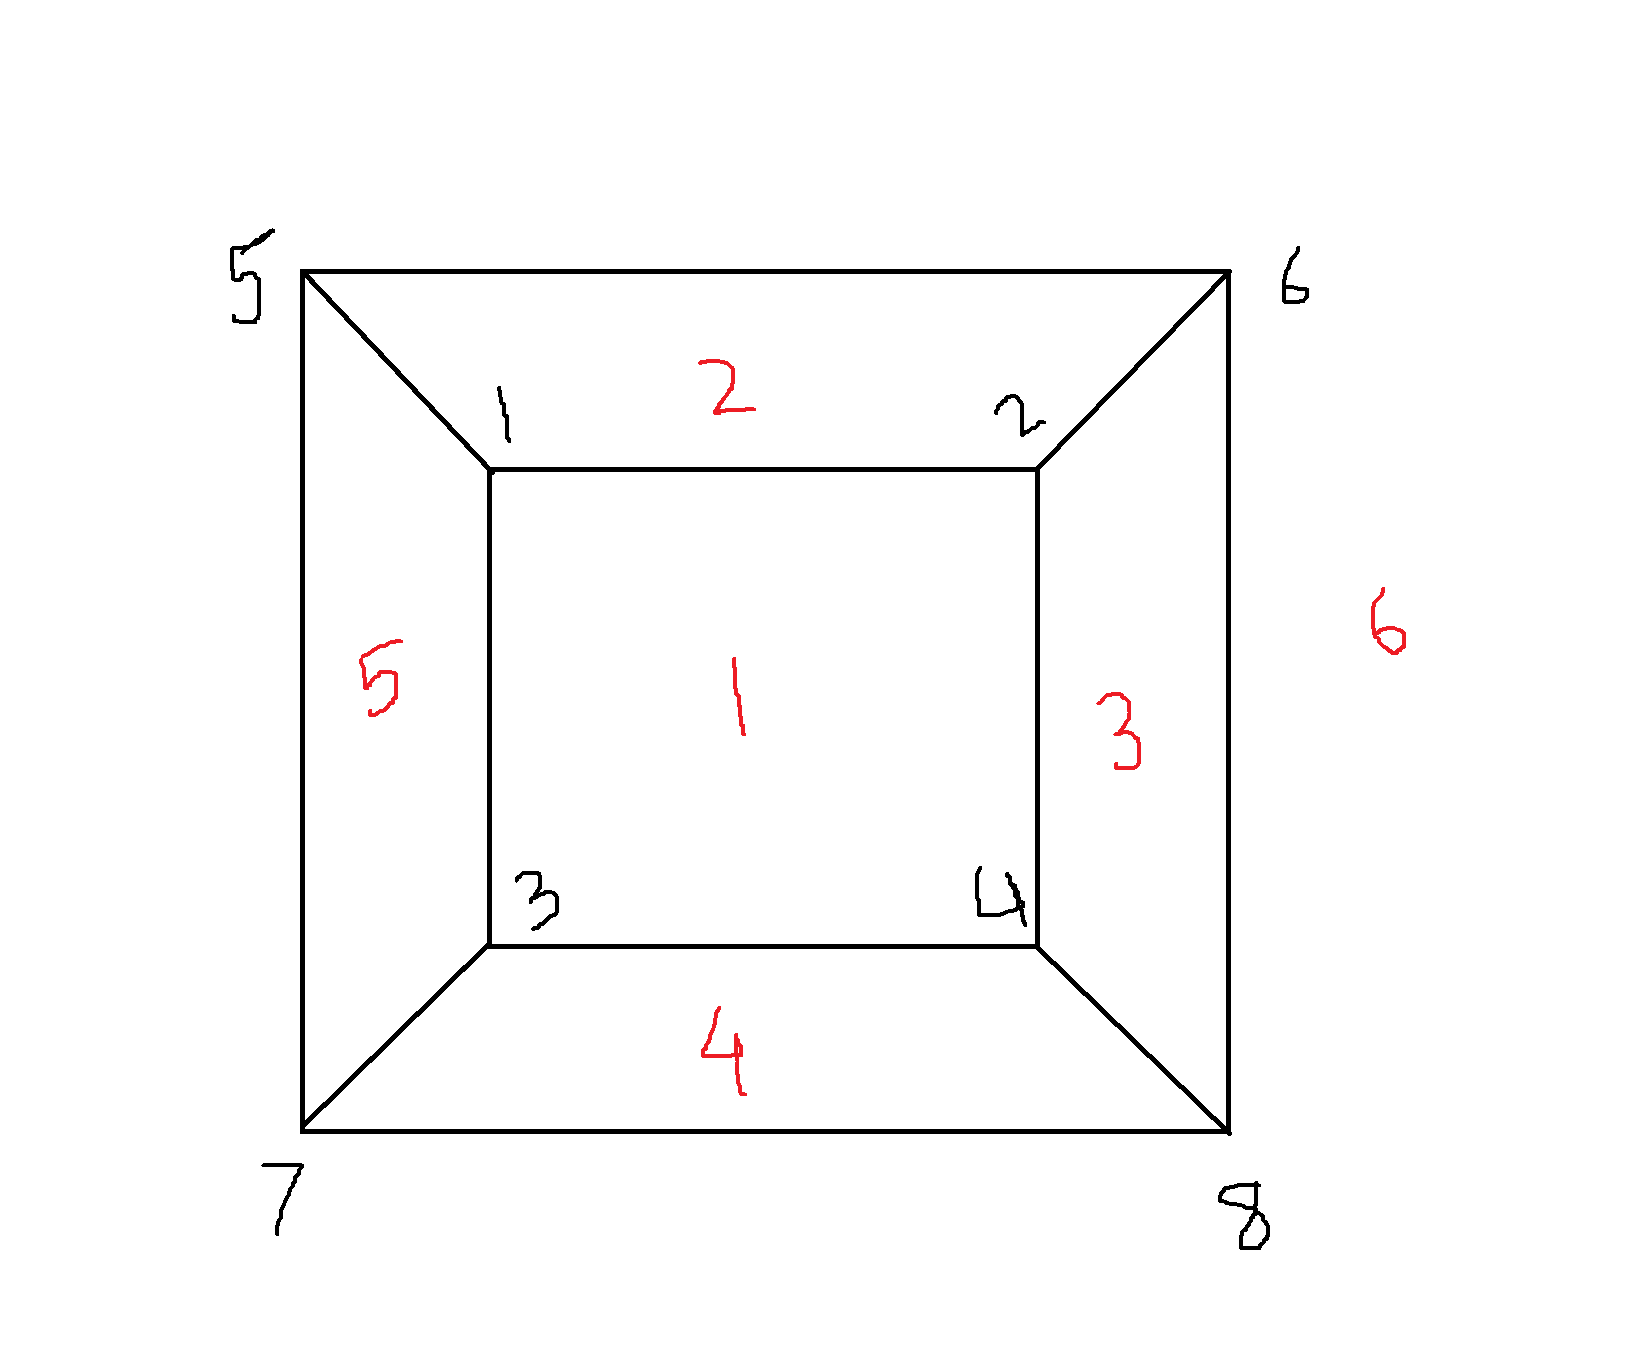

In [6]:
B0=Barnette_Graph(face_vertex_dict)

In [7]:
B0.face_vertex_dict

{'1': [1, 2, 4, 3],
 '2': [5, 6, 2, 1],
 '3': [2, 6, 8, 4],
 '4': [3, 4, 8, 7],
 '5': [5, 1, 3, 7],
 '6': [5, 6, 8, 7]}

In [8]:
B0.startState()

'1'

In [9]:
B0.boundary_and_interior('1.2.3')

(array([1, 3, 4, 5, 6, 8]), array([2]))

In [10]:
B0.isEnd('4.2.5.1')

False

In [11]:
B0.isEnd('2.6.1')

True

In [12]:
B0.actions('1.2')

['4', '6']

In [13]:
B0.Successor_and_Cost('1.2')

[('4', '1.2.4', -8), ('6', '1.2.6', -8)]

In [14]:
B0.Successor_and_Cost('1.4')

[('2', '1.4.2', -8), ('6', '1.4.6', -8)]

In [15]:
uniformcostsearch(B0)

('1.2.4', -14)

In [16]:
def alpha(face_vertex_dict, random_state=42):
    #print(face_vertex_dict)
    random.seed(random_state)
    np.random.seed(random_state)
    
    random_face=np.random.choice(list(face_vertex_dict.keys()))
    
    #print('Randomly chosen face for alpha operation:', random_face)
    
    odd_edges=[]
    even_edges=[]
    for i in range(len(face_vertex_dict[random_face])):
        if i%2==0:
            odd_edges.append((face_vertex_dict[random_face][i],face_vertex_dict[random_face][(i+1)%len(face_vertex_dict[random_face])]))
        else:
            even_edges.append((face_vertex_dict[random_face][i],face_vertex_dict[random_face][(i+1)%len(face_vertex_dict[random_face])]))
        
    toss=np.random.choice([1,0])
    if toss==1:
        selected_edges=[odd_edges[i] for i in (np.random.choice(len(odd_edges),2,replace=False))]
    else:
        selected_edges=[even_edges[i] for i in (np.random.choice(len(even_edges),2,replace=False))]
        
    #print('First selected edge for alpha operation:',selected_edges[0])
    #print('Second selected edge for alpha operation:',selected_edges[1])
    
    
    F=[]
    for key in face_vertex_dict.keys():
        random_face_vertices=face_vertex_dict[random_face]
        if key!=random_face:
            if len(set(face_vertex_dict[key]).intersection(random_face_vertices))==2:
                F.append(key)
                
    
    v_face_1_start_index=face_vertex_dict[random_face].index(selected_edges[0][1])
    v_face_1_end_index=face_vertex_dict[random_face].index(selected_edges[1][0])
    v_face_2_start_index=face_vertex_dict[random_face].index(selected_edges[1][1])
    v_face_2_end_index=face_vertex_dict[random_face].index(selected_edges[0][0])
    
    
    face_1=[]
    index=v_face_1_start_index
    while index%len(face_vertex_dict[random_face])!=v_face_1_end_index:
        mod_index=index%len(face_vertex_dict[random_face])
        face_1=[*face_1,face_vertex_dict[random_face][mod_index]]
        index=index+1
    
    face_1=[*face_1,face_vertex_dict[random_face][v_face_1_end_index]]
    
    face_2=[]
    index=v_face_2_start_index
    while index%len(face_vertex_dict[random_face])!=v_face_2_end_index:
        mod_index=index%len(face_vertex_dict[random_face])
        face_2=[*face_2,face_vertex_dict[random_face][mod_index]]
        index=index+1
    face_2=[*face_2,face_vertex_dict[random_face][v_face_2_end_index]]
    
    
    num_vertices=findmax(list(face_vertex_dict.values()))
    
    new_vertex_1=num_vertices+1
    new_vertex_2=num_vertices+2
    new_vertex_3=num_vertices+3
    new_vertex_4=num_vertices+4
    
    face_1_with_new_vertex=[new_vertex_2]
    for vertex in face_1:
        face_1_with_new_vertex=[*face_1_with_new_vertex,vertex]
    face_1_with_new_vertex=[*face_1_with_new_vertex,new_vertex_3]
    
    face_2_with_new_vertex=[new_vertex_4]
    for vertex in face_2:
        face_2_with_new_vertex=[*face_2_with_new_vertex,vertex]
    face_2_with_new_vertex=[*face_2_with_new_vertex,new_vertex_1]
        
    face_vertex_dict[random_face]=[new_vertex_1,new_vertex_2,new_vertex_3,new_vertex_4]
    
    face_index_1=str(max([eval(i) for i in list(face_vertex_dict.keys())])+1)
    face_index_2=str(max([eval(i) for i in list(face_vertex_dict.keys())])+2)
    
    face_vertex_dict[face_index_1]=face_1_with_new_vertex
    face_vertex_dict[face_index_2]=face_2_with_new_vertex
    
    
    neighbors_of_new_vertex_1_in_new_face_2=findAdjacentElements(face_2_with_new_vertex,new_vertex_1)[0]
    neighbors_of_new_vertex_2_in_new_face_1=findAdjacentElements(face_1_with_new_vertex,new_vertex_2)[0]
    neighbors_of_new_vertex_3_in_new_face_1=findAdjacentElements(face_1_with_new_vertex,new_vertex_3)[0]
    
    neighbors_of_new_vertex_4_in_new_face_2=findAdjacentElements(face_2_with_new_vertex,new_vertex_4)[0]
    
    
    
    other_affected_faces=[]
    
    
    for face in F:
        if len(set(face_vertex_dict[face]).intersection(set(selected_edges[0])))==2:
            other_affected_faces=(*other_affected_faces,face)
            
      
    for face in F:
        if len(set(face_vertex_dict[face]).intersection(set(selected_edges[1])))==2:
            other_affected_faces=(*other_affected_faces,face)
            
    
    
    neighbors_of_new_vertex_2_in_mod_face_1=list(set(neighbors_of_new_vertex_2_in_new_face_1).intersection(set(face_1_with_new_vertex)))
    neighbors_of_new_vertex_3_in_mod_face_1=list(set(neighbors_of_new_vertex_3_in_new_face_1).intersection(set(face_1_with_new_vertex)))
      
    neighbors_of_new_vertex_1_in_mod_face_2=list(set(neighbors_of_new_vertex_1_in_new_face_2).intersection(set(face_2_with_new_vertex)))
    neighbors_of_new_vertex_4_in_mod_face_2=list(set(neighbors_of_new_vertex_4_in_new_face_2).intersection(set(face_2_with_new_vertex)))
    
    
    
    
    neb_dict_mod_face={neighbors_of_new_vertex_1_in_mod_face_2[0]: new_vertex_1, neighbors_of_new_vertex_2_in_mod_face_1[0]: new_vertex_2, neighbors_of_new_vertex_3_in_mod_face_1[0]: new_vertex_3, neighbors_of_new_vertex_4_in_mod_face_2[0]: new_vertex_4}
     
    mod_faces=[]     
    for i in range(len(other_affected_faces)):
        index_1=face_vertex_dict[other_affected_faces[i]].index(selected_edges[i][0])
        index_2=face_vertex_dict[other_affected_faces[i]].index(selected_edges[i][1])
        
        index_1_neb=neb_dict_mod_face[face_vertex_dict[other_affected_faces[i]][index_1]]
        index_2_neb=neb_dict_mod_face[face_vertex_dict[other_affected_faces[i]][index_2]]
            
        if (index_1==index_2+1) or (index_2==index_1+1):
            if index_1>index_2:
                #order=(index_2_neb,index_1_neb)
                face_vertex_dict[other_affected_faces[i]]=plug_at_position(face_vertex_dict[other_affected_faces[i]],index_2_neb,index_2)
                face_vertex_dict[other_affected_faces[i]]=plug_at_position(face_vertex_dict[other_affected_faces[i]],index_1_neb,index_2+1)
            else:
                #order=(index_1_neb,index_2_neb)
                face_vertex_dict[other_affected_faces[i]]=plug_at_position(face_vertex_dict[other_affected_faces[i]],index_1_neb,index_1)
                face_vertex_dict[other_affected_faces[i]]=plug_at_position(face_vertex_dict[other_affected_faces[i]],index_2_neb,index_1+1)
        else: 
            k=len(face_vertex_dict[other_affected_faces[i]])-1
            if index_1==k:
                face_vertex_dict[other_affected_faces[i]]=[*face_vertex_dict[other_affected_faces[i]],index_1_neb,index_2_neb]
            else:
                face_vertex_dict[other_affected_faces[i]]=[*face_vertex_dict[other_affected_faces[i]],index_2_neb,index_1_neb]
    
    
  
    return face_vertex_dict
    

In [17]:
F={'1':[1,2,4,3],'2':[5,6,2,1],'3':[2,6,8,4],'4':[3,4,8,7],'5':[5,1,3,7],'6':[5,6,8,7]}

In [18]:
B1_graph=alpha(F)

In [19]:
B1=Barnette_Graph(B1_graph)

In [20]:
uniformcostsearch(B1)

('1.2.6', -20)

In [21]:
def generate_barnette_graph(alpha_iterations,random_state=42):
    B0_face_vertex_dict={'1':[1,2,4,3],'2':[5,6,2,1],'3':[2,6,8,4],'4':[3,4,8,7],'5':[5,1,3,7],'6':[5,6,8,7]}
    Barnette_graph_face_vertex_dict=B0_face_vertex_dict
    for i in range(alpha_iterations):
        Barnette_graph_face_vertex_dict=alpha(Barnette_graph_face_vertex_dict, random_state)
    print('Generated Graph with '+str(len(list(Barnette_graph_face_vertex_dict.keys())))+' faces')
    print('Generated Graph with '+str(findmax(list(Barnette_graph_face_vertex_dict.values())))+' vertices')
    return Barnette_graph_face_vertex_dict

In [22]:
Barnette_graph_face_vertex_dict=generate_barnette_graph(500,random_state=79)

Generated Graph with 1006 faces
Generated Graph with 2008 vertices


In [23]:
barnette_graph=Barnette_Graph(Barnette_graph_face_vertex_dict)

In [ ]:
uniformcostsearch(barnette_graph)